Unique sorted values of alcohol: [8.4, 8.8, 9.0, 9.05, 9.1, 9.2, 9.23333333333333, 9.25, 9.3, 9.4, 9.5, 9.55, 9.56666666666667, 9.6, 9.7, 9.8, 9.9, 10.0, 10.0333333333333, 10.1, 10.2, 10.3, 10.4, 10.5, 10.55, 10.6, 10.7, 10.8, 10.9, 11.0, 11.0666666666667, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 11.95, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.3, 13.4, 13.5, 13.5666666666667, 13.6, 14.0, 14.9]
Lower bound: 8.4, Upper bound: 8.8
Lower bound: 8.8, Upper bound: 9.0
Lower bound: 9.0, Upper bound: 9.05
Lower bound: 9.05, Upper bound: 9.1
Lower bound: 9.1, Upper bound: 9.2
Lower bound: 9.2, Upper bound: 9.23333333333333
Lower bound: 9.23333333333333, Upper bound: 9.25
Lower bound: 9.25, Upper bound: 9.3
Lower bound: 9.3, Upper bound: 9.4
Lower bound: 9.4, Upper bound: 9.5
Lower bound: 9.5, Upper bound: 9.55
Lower bound: 9.55, Upper bound: 9.56666666666667
Lower bound: 9.56666666666667, Upper bound: 9.6
Lower bound: 9.6, Upper bound: 9.7
Lower bo

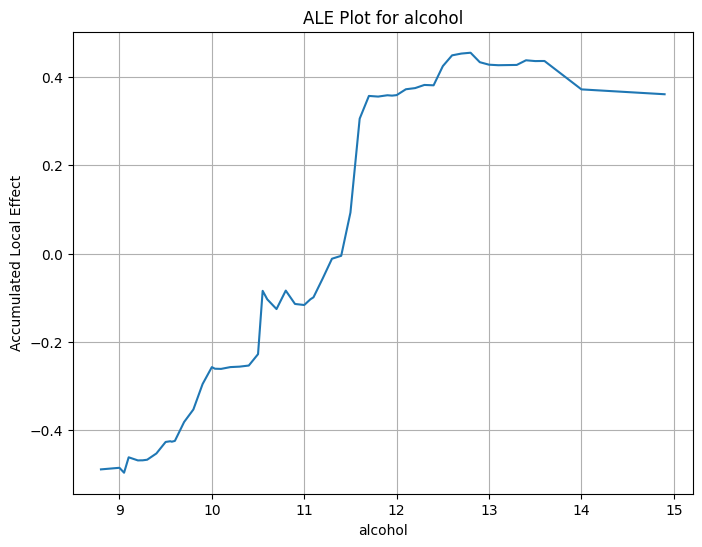

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the wine quality dataset
data = pd.read_csv("winequality-red.csv", delimiter=';')

# Check the first few rows
data.head()

# Separate features and target
X = data.drop('quality', axis="columns")  # Features
y = data['quality']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Choose the feature to explain with ALE plot (e.g., 'alcohol')
feature_name = 'alcohol'
feature_values = sorted(X_train[feature_name].unique())
print(f"Unique sorted values of {feature_name}: {feature_values}")

# Calculate ALE values
ale_values = []
for i in range(1, len(feature_values)):
    lower_bound = feature_values[i - 1]
    upper_bound = feature_values[i]
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    
    # Create two copies of the dataset for the lower and upper intervals
    X_temp_lower = X_train.copy()
    X_temp_upper = X_train.copy()
    
    # Replace the selected feature with the current interval bounds
    X_temp_lower[feature_name] = lower_bound
    X_temp_upper[feature_name] = upper_bound
    
    # Predict on both intervals and compute the difference
    pred_lower = rf.predict(X_temp_lower)
    pred_upper = rf.predict(X_temp_upper)
    
    ale = np.mean(pred_upper - pred_lower)  # Local effect
    ale_values.append(ale)

# Accumulate the local effects to get the ALE
ale_cumulative = np.cumsum(ale_values)
ale_cumulative_centered = ale_cumulative - np.mean(ale_cumulative)

# Plotting the ALE Plot
plt.figure(figsize=(8, 6))
plt.plot(feature_values[1:], ale_cumulative_centered)
plt.xlabel(feature_name)
plt.ylabel('Accumulated Local Effect')
plt.title(f'ALE Plot for {feature_name}')
plt.grid(True)
plt.show()

